In [1]:
import torch
import numpy as np
import matplotlib.pyplot as plt
from torch.autograd import Variable
import warnings
warnings.filterwarnings('ignore')
np.random.seed(0)

# Data Loading & Preprocessing:

    1. Loading the dataset and Transform into Tensors:

In [2]:
from torchvision import datasets, transforms
dataset_path=datasets.ImageFolder(root='fruits360/Training/', transform=transforms.Compose([transforms.ToTensor()]))

    2. Spliting the dataset Into Train and Test:
    
        Spliting the Dataset into 80% training and 20% testing dataset, and shuffling the dataset to distribute the train 
        and test into random examples 
        

In [3]:
from torch.utils.data.sampler import SubsetRandomSampler

split = int(0.8 * len(dataset_path))
index_list = list(range(len(dataset_path)))
np.random.shuffle(index_list)
train_idx, test_idx = index_list[:split], index_list[split:] ## Traing and testing indexes.


## create sampler objects using SubsetRandomSampler
tr_sampler = SubsetRandomSampler(train_idx)
test_sampler = SubsetRandomSampler(test_idx)
## create iterator objects for train and test datasets
train_loader = torch.utils.data.DataLoader(dataset_path, batch_size=256, sampler=tr_sampler)
test_loader = torch.utils.data.DataLoader(dataset_path, batch_size=256, sampler=test_sampler)

print ("Total Number of Examples: ",len(dataset_path))
print ("Number of training Examples: ",len(tr_sampler))
print ("Number of testing Examples: ",len(test_sampler))

Total Number of Examples:  8147
Number of training Examples:  6517
Number of testing Examples:  1630


In [4]:
Classes_num=len(train_loader.dataset.classes)
print ('Number of Classes',Classes_num)
print('Classes Name: ', train_loader.dataset.classes)

Number of Classes 15
Classes Name:  ['Rambutan', 'Raspberry', 'Redcurrant', 'Salak', 'Strawberry', 'Strawberry Wedge', 'Tamarillo', 'Tangelo', 'Tomato 1', 'Tomato 2', 'Tomato 3', 'Tomato 4', 'Tomato Cherry Red', 'Tomato Maroon', 'Walnut']


Example: 


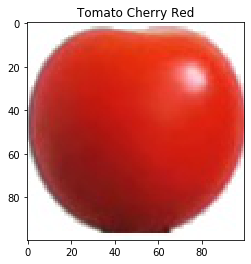

In [5]:
print ('Example: ')
i1, l1 = next(iter(train_loader))
plt.title(train_loader.dataset.classes[l1[0]])
plt.imshow(np.array(i1[0].permute(1, 2, 0)));

# Neural Network Model

The neural network architectures in PyTorch can be defined in a class which inherits the properties from the base class from nn package called Module. This inheritance from the nn.Module class allows us to implement, access, and call a number of methods easily. We can define all the layers inside the constructor of the class, and the forward propagation steps inside the forward function.

Our Input image has [100,100,3] dimensions, so we flatten our input to 100*100*3=30000 array and forward it neural network. 
We will define a network with the following layer configurations: [30000, 128,Number of classes]. This configuration represents the 30000 nodes (100*100*3 pixels) in the input layer, 128 in the hidden layer, and 15 in the output layer as 15 number of classes. Inside the forward function, we will use the relu activation function in the hidden layer (which can be accessed from the nn module).

![ANN Model](ANN.png)

In [5]:
from torch import nn
import torch.nn.functional as F

class Model(nn.Module):
    def __init__(self):
        super().__init__()
        self.hidden = nn.Linear(100 * 100*3, 128)
        self.output = nn.Linear(128, Classes_num)
    def forward(self, x):
        x = self.hidden(x)
        x = F.sigmoid(x)
        x = self.output(x)
        return x
model = Model()
print(model)

Model(
  (hidden): Linear(in_features=30000, out_features=128, bias=True)
  (output): Linear(in_features=128, out_features=15, bias=True)
)


Define the loss function and the optimizer using the nn and optim package:

In [6]:
from torch import optim
loss_function = nn.CrossEntropyLoss()
optimizer = optim.SGD(model.parameters(), lr=0.01, weight_decay= 1e-6, momentum = 0.9, nesterov = True)
# create a loss function

# Model Training

We are now ready to train the model. The core steps are Forward Propagation, Loss Computation, Backpropagation, and updating the parameters.


In [7]:
# run the main training loop
loss_array=[]
epochs=50
for epoch in range(1,epochs):
    
    for batch_idx, (data, target) in enumerate(train_loader):
        
        data, target = Variable(data), Variable(target)
        
        # resize data from (batch_size, 100, 100, 3) to (batch_size, 100*100*3)
        data = data.view(-1, 100*100*3)
        #In PyTorch, we need to set the gradients to zero before starting to do backpropragation because PyTorch
        optimizer.zero_grad()## accumulates the gradients on subsequent backward passes.
        
        ## 1. forward propagation
        model_out = model(data)
        
        ## 2. loss calculation
        loss = loss_function(model_out, target)
        
        ## 3. backward propagation
        loss.backward()
        
        ## 4. weight optimization
        optimizer.step()
        
        loss_array.append(loss.item())
        if batch_idx % len(train_loader)-1 == 0:
            
            print('Epoch: ',epoch,'Loss: ', loss.item())

Epoch:  1 Loss:  2.6748509407043457
Epoch:  2 Loss:  1.7902168035507202
Epoch:  3 Loss:  1.1171925067901611
Epoch:  4 Loss:  0.7564298510551453
Epoch:  5 Loss:  0.5610706806182861
Epoch:  6 Loss:  0.4116120934486389
Epoch:  7 Loss:  0.3198734223842621
Epoch:  8 Loss:  0.2717355787754059
Epoch:  9 Loss:  0.21908694505691528
Epoch:  10 Loss:  0.17240948975086212
Epoch:  11 Loss:  0.1595456749200821
Epoch:  12 Loss:  0.12562599778175354
Epoch:  13 Loss:  0.11919182538986206
Epoch:  14 Loss:  0.10306327044963837
Epoch:  15 Loss:  0.08495326340198517
Epoch:  16 Loss:  0.07130157947540283
Epoch:  17 Loss:  0.083198182284832
Epoch:  18 Loss:  0.07204686105251312
Epoch:  19 Loss:  0.0701143816113472
Epoch:  20 Loss:  0.061041250824928284
Epoch:  21 Loss:  0.04807082563638687
Epoch:  22 Loss:  0.04917428269982338
Epoch:  23 Loss:  0.0481749102473259
Epoch:  24 Loss:  0.04380859434604645
Epoch:  25 Loss:  0.04609214887022972
Epoch:  26 Loss:  0.04174267500638962
Epoch:  27 Loss:  0.0398297794163

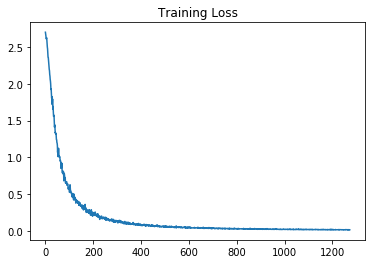

In [9]:
%matplotlib inline
plt.plot(loss_array)
plt.title("Training Loss")
plt.show()

# Model Testing

Once the model is trained, Lets test it on test dataset.

    1. Testing on some example

In [10]:
## dataloader for test dataset 
dataiter = iter(test_loader)
data, labels = dataiter.next()
data, target = Variable(data), Variable(target)
data_ = data.view(-1, 100*100*3)

output = model(data_)
_, preds_tensor = torch.max(output, 1)
preds = np.squeeze(preds_tensor.numpy())
print ("Actual:   ", np.array(labels[:10]))
print ("Predicted:", preds[:10])

Actual:    [10  2  5  5  5  5 12  2 12  4]
Predicted: [10  2  5  5  5  5 12  2 12  4]


    2. Checking Accuracy of Model

In [11]:
# run a test loop
test_loss = 0
correct = 0
for data, target in test_loader:
    data, target = Variable(data), Variable(target)
    data = data.view(-1, 100*100*3)
    net_out = model(data)
    # sum up batch loss
    
    test_loss += loss_function(net_out, target).item()
    pred = net_out.data.max(1)[1]  # get the index of the max log-probability
    correct += pred.eq(target.data).sum()

test_loss /= len(test_loader.dataset)

print('Average loss: ',test_loss)
print('Accuracy: ',np.array(100. * correct / len(test_sampler)),'%')
print ('Total Test Examples: ',len(test_sampler))
print ('Correct predicted Examples: ',int(correct))


Average loss:  1.4010699068284025e-05
Accuracy:  100 %
Total Test Examples:  1630
Correct predicted Examples:  1630
